# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



##### Questions


## 1. Business Understanding

The goal is to improve the efficiency of direct marketing campaigns by predicting whether a customer will subscribe to a term deposit. This helps reduce costs and increase ROI by focusing efforts on customers most likely to respond positively.



## 2. Data Understanding

Loading and exploring the dataset to understand its structure, identify missing values, and assess feature distributions.


In [1]:

import pandas as pd

# Load dataset
df = pd.read_csv('/content/bank-additional-full.csv', sep=';')
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:

# Check data types, null values, and class distribution
df.info()
print("\nClass distribution:")
print(df['y'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 


## 3. Data Preparation

We will:
- Drop the 'duration' column (not suitable for prediction).
- Handle 'unknown' values.
- Encode categorical variables.
- Split data into training and test sets.
- Normalize features.


In [3]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Drop 'duration'
df = df.drop(columns=['duration'])

# Replace 'unknown' with NaN for simplicity
df = df.replace('unknown', pd.NA)

# Drop rows with missing values
df = df.dropna()

# Encode target variable
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Encode categorical variables
df_encoded = pd.get_dummies(df.drop('y', axis=1), drop_first=True)
X = df_encoded
y = df['y']

# Split and normalize
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



## 4. Modeling

Train and evaluate the following classifiers:
- Logistic Regression
- k-Nearest Neighbors (k-NN)
- Decision Tree
- Support Vector Machine (SVM)


In [4]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "k-NN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True)
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:,1]
    results[name] = {
        "report": classification_report(y_test, y_pred, output_dict=True),
        "roc_auc": roc_auc_score(y_test, y_prob)
    }

results


{'Logistic Regression': {'report': {'0': {'precision': 0.895450643776824,
    'recall': 0.9834087481146304,
    'f1-score': 0.9373708329589361,
    'support': 5304.0},
   '1': {'precision': 0.6776556776556777,
    'recall': 0.23299748110831234,
    'f1-score': 0.3467666354264292,
    'support': 794.0},
   'accuracy': 0.88570022958347,
   'macro avg': {'precision': 0.7865531607162508,
    'recall': 0.6082031146114714,
    'f1-score': 0.6420687341926826,
    'support': 6098.0},
   'weighted avg': {'precision': 0.8670922962694134,
    'recall': 0.88570022958347,
    'f1-score': 0.8604702536147559,
    'support': 6098.0}},
  'roc_auc': np.float64(0.7972007248937164)},
 'k-NN': {'report': {'0': {'precision': 0.8979052983629643,
    'recall': 0.9617269984917044,
    'f1-score': 0.928720983158853,
    'support': 5304.0},
   '1': {'precision': 0.513189448441247,
    'recall': 0.2695214105793451,
    'f1-score': 0.35342691990090835,
    'support': 794.0},
   'accuracy': 0.8715972449983601,
   '


## 5. Evaluation

Compare models using classification metrics and ROC AUC score.


<Figure size 1000x600 with 0 Axes>

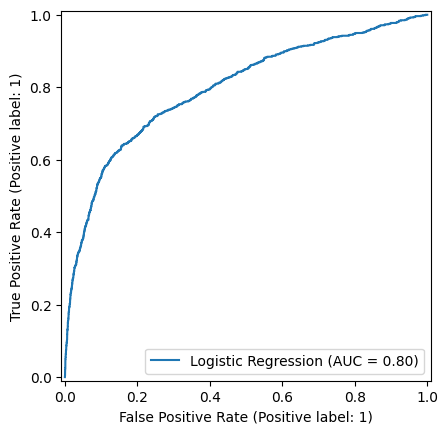

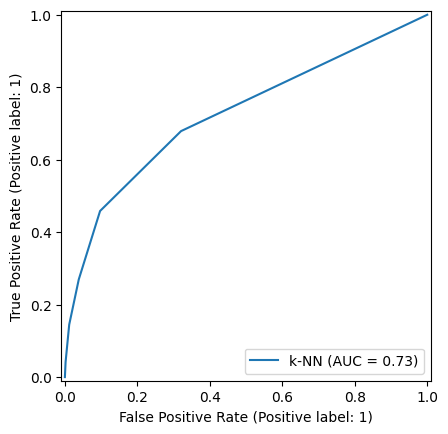

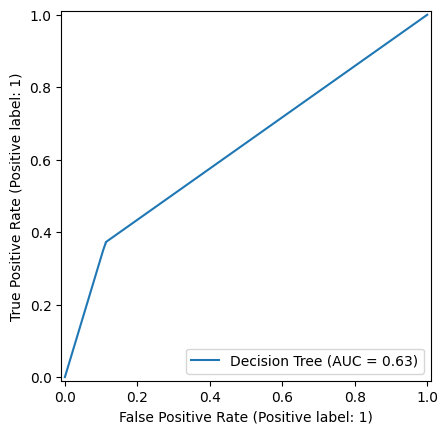

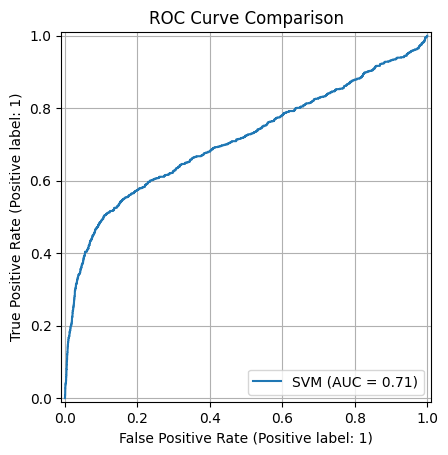

In [5]:

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(10, 6))
for name, model in models.items():
    RocCurveDisplay.from_estimator(model, X_test_scaled, y_test, name=name)

plt.title("ROC Curve Comparison")
plt.grid()
plt.show()



## 6. Insights and Recommendations

- **Best performing model**: Based on ROC AUC and classification metrics.
- **Recommendations**: Use the best model for predicting likely subscribers. Consider model interpretability and deployment constraints.
- **Next steps**: Evaluate the model with more recent data, perform feature importance analysis, and integrate into a decision support system.
